# Fire outbreak detection
The goal of this project is to provide a service for fire outbreak detection using basic information

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from datetime import datetime
%matplotlib inline

# Retrieve the credentials for MS Vision API
api_credentials = np.load('api_credentials.npy').item()
classif_setup = {'project_id': '3b413cb2-f48f-485b-a8cf-c838655521dc', 'iter_id': '154c007c-9da6-4365-a2fb-87dd4d2a2e3c'}
obj_detec_setup = {'project_id': 'ff38fc9f-ce78-49c0-bfaa-abc816da7f27', 'iter_id': '8a5dbfb0-19f9-4916-99b7-0c567a3ec5b7'}
obj_detec_setup2 = {'project_id': 'ff38fc9f-ce78-49c0-bfaa-abc816da7f27', 'iter_id': 'aee4f95d-4d2b-4a30-987b-cd71fbf9c7ab'}

{"Départ d'incendie": 0.557007, 'pas de départ': 0.0001707096}
Execution time: 0:00:00.960065 s


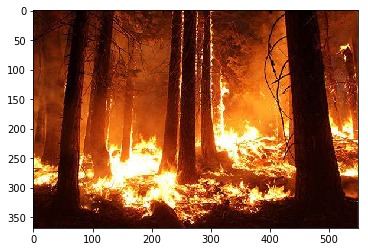

In [2]:
# Get the classification of a sample image
from api_vision.api_mgt import get_msvision_classif

img_sample_path = os.path.join('samples', 'wildfire.jpg')

img = mpimg.imread(img_sample_path)
imgplot = plt.imshow(img)

with open(img_sample_path, mode="rb") as img:
    starting_time = datetime.now()
    print(get_msvision_classif(img, api_credentials['classification'], classif_setup))
    print('Execution time: %s s' % (datetime.now() - starting_time))

Execution time: 0:00:00.851853 s


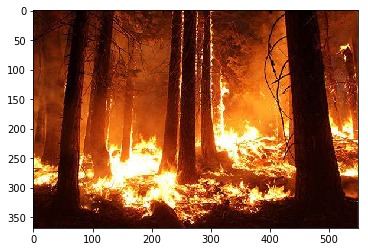

In [3]:
# Get the bounding box of a sample image
from api_vision.api_mgt import get_msvision_objdetection
img_sample_path = os.path.join('samples', 'wildfire.jpg')

img = mpimg.imread(img_sample_path)
imgplot = plt.imshow(img)

with open(img_sample_path, mode="rb") as img:
    starting_time = datetime.now()
    pred_boxes, pred_labs, pred_conf = get_msvision_objdetection(img, api_credentials['obj_detection'], obj_detec_setup)
    print('Execution time: %s s' % (datetime.now() - starting_time))

['flame (0.493871927)', 'flame (0.507419944)', 'flame (0.371399343)', 'flame (0.271383464)', 'smoke (0.3969854)']


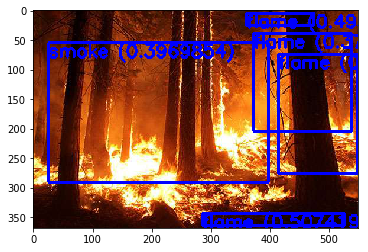

In [4]:
# Plot the results
img = cv2.imread(img_sample_path)
from utils.graphics_lib import add_boxes
labs = ['%s (%s)' % (lab, pred_conf[idx]) for idx, lab in enumerate(pred_labs)]
print(labs)
img2 = add_boxes(img, pred_boxes, labs, color=(255, 0, 0), label_out=False)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
imgplot2 = plt.imshow(img2)

Execution time: 0:00:00.880401 s
['flame (0.315461725)', 'flame (0.383756)', 'flame (0.201532066)', 'flame (0.42567867)', 'smoke (0.297573745)', 'smoke (0.3629701)']


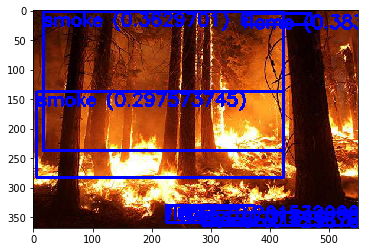

In [7]:
with open(img_sample_path, mode="rb") as img:
    starting_time = datetime.now()
    pred_boxes, pred_labs, pred_conf = get_msvision_objdetection(img, api_credentials['obj_detection'], obj_detec_setup2)
    print('Execution time: %s s' % (datetime.now() - starting_time))

# Plot the results
img_cv = cv2.imread(img_sample_path)
from utils.graphics_lib import add_boxes
labs = ['%s (%s)' % (lab, pred_conf[idx]) for idx, lab in enumerate(pred_labs)]
print(labs)
img3 = add_boxes(img_cv, pred_boxes, labs, color=(255, 0, 0), label_out=False)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
imgplot2 = plt.imshow(img3)